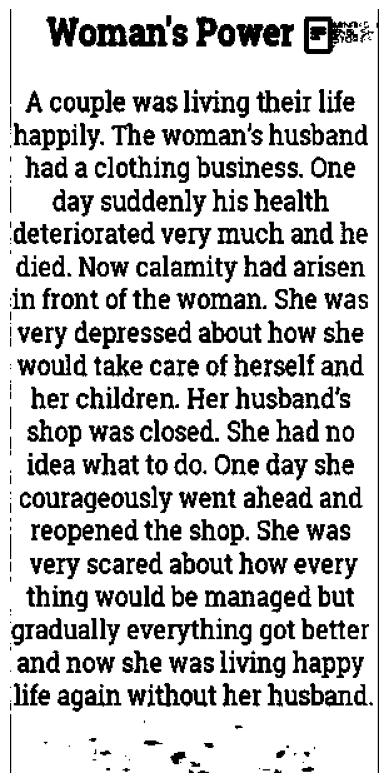

In [1]:
import cv2
from matplotlib import pyplot as plt
import os  # Import the os module

# Load the image
img = cv2.imread(r"C:\Users\yashy\OneDrive\Desktop\Picture1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def remove_borders(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y + h, x:x + w]
    return crop

no_borders = remove_borders(img)
# Check if the folder exists, if not create it
if not os.path.exists("temp"):
    os.makedirs("temp")  # Create the temp directory if it doesn't exist
cv2.imwrite("temp/no_borders.jpg", no_borders)

#cropping image 
# import cv2

# # Global variables to store mouse click coordinates
# start_x, start_y, end_x, end_y = -1, -1, -1, -1
# cropping = False

# # Mouse callback function
# def click_and_crop(event, x, y, flags, param):
#     global start_x, start_y, end_x, end_y, cropping, image_copy

#     if event == cv2.EVENT_LBUTTONDOWN:
#         start_x, start_y = x, y
#         end_x, end_y = x, y
#         cropping = Tru

#     elif event == cv2.EVENT_MOUSEMOVE:
#         if cropping:
#             end_x, end_y = x, y

#     elif event == cv2.EVENT_LBUTTONUP:
#         end_x, end_y = x, y
#         cropping = False

#         # Draw a rectangle around the region of interest
#         cv2.rectangle(image_copy, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
#         cv2.imshow("Image", image_copy)

# # Load the image
# image = cv2.imread("dinesh.jpg")
# image_copy = image.copy()

# # Create a window and set the mouse callback function
# cv2.namedWindow("Image")
# cv2.setMouseCallback("Image", click_and_crop)

# while True:
#     cv2.imshow("Image", image_copy)
#     key = cv2.waitKey(1) & 0xFF

#     # Press "r" to reset the cropping region
#     if key == ord("r"):
#         image_copy = image.copy()

#     # Press "c" to crop and display the cropped region
#     elif key == ord("c"):
#         if start_x != -1 and start_y != -1 and end_x != -1 and end_y != -1:
#             # Crop the region of interest
#             cropped_image = image[start_y:end_y, start_x:end_x]

#             # Display the cropped image
#             cv2.imshow("Cropped Image", cropped_image)

#             # Save the cropped image
#             cv2.imwrite("cropped_image.jpg", cropped_image)
#             print("Cropped image saved as 'cropped_image.jpg'")

#     # Press "q" to quit
#     elif key == ord("q"):
#         break

# cv2.destroyAllWindows()

adaptive = cv2.adaptiveThreshold(no_borders,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,151,8)
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

# Now you can save the image
cv2.imwrite("temp/adaptimage.jpg", adaptive)
display("temp/adaptimage.jpg")
# cv2.imshow('Adaptive',adaptive)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [2]:
import pytesseract
from PIL import Image
from spellchecker import SpellChecker
from deep_translator import GoogleTranslator
import re

# Configure Tesseract-OCR path (Modify this based on your system)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Step 1: Extract text using OCR
def extract_text(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text.strip()

# Step 2: Clean extracted text (Remove only unwanted symbols but keep punctuation)
def clean_text(text):
    text = re.sub(r'\b[Ff]\b', '', text)  # Remove only the isolated 'F' or 'f'
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spaces
    return text

# Step 3: Correct spelling while preserving punctuation & apostrophes
def correct_text(text):
    spell = SpellChecker()
    words = re.findall(r"[\w']+|[.,!?;]", text)  # Preserve punctuation & apostrophes
    corrected_words = [
        word if "'" in word else spell.correction(word) if word.isalpha() and spell.correction(word) else word
        for word in words
    ]
    return " ".join(corrected_words)

# Step 4: Translate text
def translate_text(text, target_language):
    return GoogleTranslator(source="auto", target=target_language).translate(text)

# Step 5: Process the image
image_path = r"C:\Users\yashy\OneDrive\Desktop\Picture1.jpg" # Replace with actual path
extracted_text = extract_text(image_path)
cleaned_text = clean_text(extracted_text)
corrected_text = correct_text(cleaned_text)

print("\nExtracted Text:\n", extracted_text)
print("\nCleaned Text:\n", cleaned_text)
print("\nCorrected Text:\n", corrected_text)

# Ask for translation language
target_lang = input("\nEnter language code for translation (e.g., 'es' for Spanish, 'ta' for Tamil'): ")
translated_text = translate_text(corrected_text, target_lang)

print("\nTranslated Text:\n", translated_text)



Extracted Text:
 Woman's Power [F}#

A couple was living their life
happily. The woman’s husband
had a clothing business. One
day suddenly his health
deteriorated very much and he
died. Now calamity had arisen
in front of the woman. She was
very depressed about how she
would take care of herself and
her children. Her husband's
shop was closed. She had no
idea what to do. One day she
courageously went ahead and
reopened the shop. She was
very scared about how every
thing would be managed but
gradually everything got better
and now she was living happy
life again without her husband.

Cleaned Text:
 Woman's Power [}# A couple was living their life happily. The woman’s husband had a clothing business. One day suddenly his health deteriorated very much and he died. Now calamity had arisen in front of the woman. She was very depressed about how she would take care of herself and her children. Her husband's shop was closed. She had no idea what to do. One day she courageously went ahead and


Enter language code for translation (e.g., 'es' for Spanish, 'ta' for Tamil'):  ta



Translated Text:
 பெண்ணின் சக்தி ஒரு தம்பதியினர் தங்கள் வாழ்க்கையை மகிழ்ச்சியாக வாழ்ந்து கொண்டிருந்தனர். அந்தப் பெண்ணின் கணவர் துணி வியாபாரம் செய்து வந்தார். ஒரு நாள் திடீரென்று அவரது உடல்நிலை மிகவும் மோசமடைந்து அவர் இறந்துவிட்டார். இப்போது அந்தப் பெண் முன் பேரழிவு ஏற்பட்டது. தன்னையும் குழந்தைகளையும் எப்படி கவனித்துக் கொள்வாள் என்று அவள் மிகவும் மனச்சோர்வடைந்தாள். அவளுடைய கணவரின் கடை மூடப்பட்டிருந்தது. அவளுக்கு என்ன செய்வது என்று தெரியவில்லை. ஒரு நாள் அவள் தைரியமாக முன்னோக்கிச் சென்று கடையை மீண்டும் திறந்தாள். எல்லாவற்றையும் எப்படிச் சமாளிப்பது என்று அவள் மிகவும் பயந்தாள், ஆனால் படிப்படியாக எல்லாம் சரியாகிவிட்டது, இப்போது அவள் கணவன் இல்லாமல் மீண்டும் மகிழ்ச்சியான வாழ்க்கையை வாழ்ந்து கொண்டிருந்தாள்.


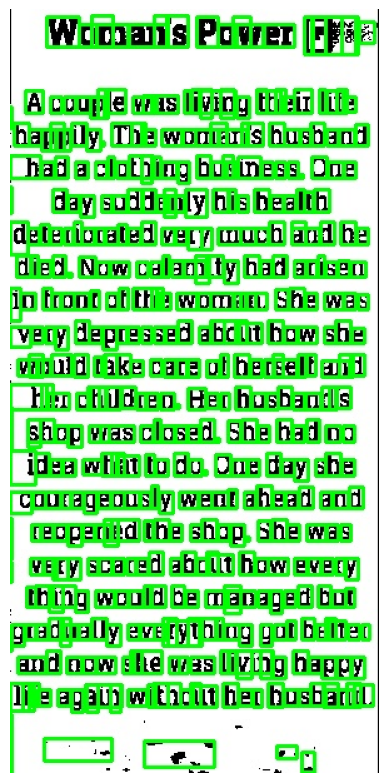

In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("temp/adaptimage.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding for better OCR accuracy
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Get OCR data
custom_config = r'--oem 3 --psm 6'  # Use OCR Engine 3 and PSM mode 6 (assumes a block of text)
ocr_data = pytesseract.image_to_boxes(thresh, config=custom_config)

# Get image dimensions
height, width = img.shape[:2]

# Draw bounding boxes for each character
for box in ocr_data.splitlines():
    box = box.split()
    x1, y1, x2, y2 = map(int, box[1:5])
    y1, y2 = height - y1, height - y2  # Convert coordinates to OpenCV format
    img = cv2.rectangle(img, (x1, y2), (x2, y1), (0, 255, 0), 2)  # Draw rectangle

# Save the output image
cv2.imwrite("output_image.jpg", img)

# Function to display the image
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

# Display the result
display("output_image.jpg")


In [5]:
from gtts import gTTS
import os

# Convert text to speech and save for download
def text_to_speech(text, language_code):
    try:
        tts = gTTS(text=text, lang=language_code)
        audio_file = "translated_speech.mp3"
        tts.save(audio_file)
        
        print(f"Audio saved as {audio_file}. You can download it now.")

        # Platform-independent audio playback
        if os.name == "nt":  # Windows
            os.system(f"start {audio_file}")
        elif os.name == "posix":  # macOS/Linux
            os.system(f"open {audio_file}" if "darwin" in os.sys.platform else f"xdg-open {audio_file}")
    
    except Exception as e:
        print("Error during TTS:", e)

# Assuming `translated_text` and `target_lang` are available from the previous cell
if translated_text:
    text_to_speech(translated_text, target_lang)
    print("\n🔽 **Download the audio file manually from your working directory: translated_speech.mp3**")
else:
    print("No text to convert to speech.")


Audio saved as translated_speech.mp3. You can download it now.

🔽 **Download the audio file manually from your working directory: translated_speech.mp3**
